In [1]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

(-8.0, 8.0)

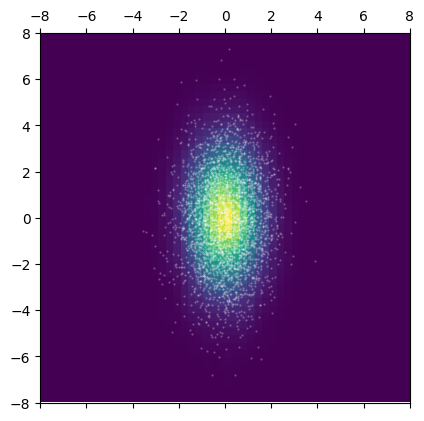

In [5]:
# simulate some data
n = 33000
x = np.random.randn(n)
y = np.random.randn(n) * 2

# data must be stacked as (# ndim, # n values) as per docs.
data = np.row_stack((x, y))

# perform KDE
kernel = gaussian_kde(data)

# create grid over which to evaluate KDE
s = np.linspace(-8, 8, 50)
grid = np.meshgrid(s, s)
# again KDE needs points to be row_stacked
grid_points = np.row_stack([g.ravel() for g in grid])

# evaluate KDE and reshape result correctly
Z = kernel(grid_points)
Z = Z.reshape(grid[0].shape)

# plot KDE as image and overlay some data points
fig, ax = plt.subplots()

ax.matshow(Z, extent=(s.min(), s.max(), s.min(), s.max()))
ax.plot(x[::10], y[::10], 'w.', ms=1, alpha=0.3)
ax.set_xlim(s.min(), s.max())
ax.set_ylim(s.min(), s.max())